# SK01 - Lineare Regression

Die lineare Regression ist ein mathematisches Verfahren, um den Zusammenhang zwischen einer unabhängigen Variable $x$ und einer abhängigen Variable $y=f(x)$ zu modellieren. Gesucht ist die Gerade, die die Datenpunkte möglichst gut beschreibt. Die Gerade hat die Form 
$$g(y) = mx + b$$, wobei $m$ die Steigung und $b$ der Achsenabschnitt ist. Ziel ist es, die Parameter so zu bestimmen, dass die Summe der quadrierten Abstände (Fehler) zwischen den tatsächlichen und den vorhergesagten Werten minimal ist. Diese __Fehlerquadratsumme__ ist die _Verlustfunktion_ für unser Modell.

### Erzeugung von Testdaten

Anstatt mühsam selbst Punktepaare einzugeben, lassen wir von `sklearn` eine Menge von Punktepaaren erzeugen: 

In [1]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples= 100, n_features= 1, noise = 10)

### Visualisierung

Visualisieren könne wir solche Daten durch die `scatter`-Methode aus `matplotlib`.

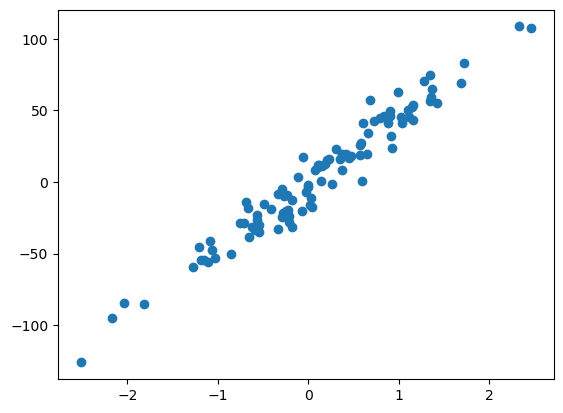

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X,y);

Obwohl stark verrauscht, liegen die Punkte erkennbar auf einer Geraden $g(x) = m x+b$. Gesucht sind nun $m$ und $b$.

## Lineare Regression mit sklearn

Die Bestimmung der Punkte ist eine Aufgabe, die mit Python-Methoden allein leicht zu lösen ist. Wir verwenden aber eine Methode aus dem Werkzeugkasten von `sklearn`:

In [3]:
from sklearn.linear_model import LinearRegression

lg = LinearRegression()
lg.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Mit `model.fit(X,y)` wird in `sklearn` das Modell an die Daten _angepasst_. In diesem Fall ist unser Modell die Gerade, und die Parameter $m$ und $b$ werden an die vorgegebenen Punkte (X,y) angepasst.

## Visualisierung

Wir zeichnen nun die ermittelte Gerade in unsere Punkt ein.

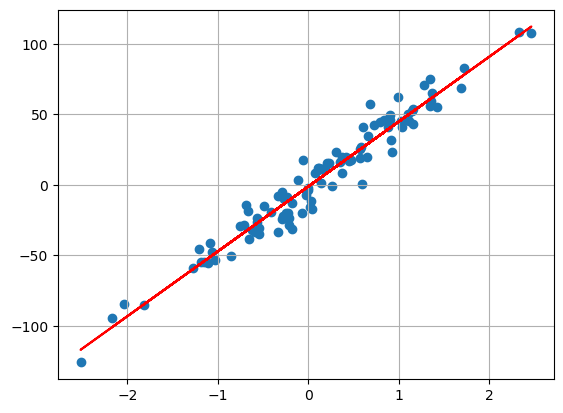

In [4]:
plt.plot(X,lg.predict(X),'r-')
plt.grid(True)
plt.scatter(X,y);

Das sieht recht gut aus. Die Punkte scheinen gleichmäßig um die Gerade herum zu streuen.

## Was bekommen wir noch?

Das ist so ziemlich das einfachste Beispiel für eines der zahlreichen Verfahren des Maschinenlernens, die in `sklearn` implementiert sind. Die einfache und vereinheitlichte Syntax macht den Umgang mit `sklearn` sehr einfach. Die Verfahren haben noch andere Methoden, z.B. den `score`:

In [5]:
print(f'Score: {lg.score(X,y):.3}')

Score: 0.951


Der Score gibt immer die Güte einer Lösung an; im Fall der Linearen Regression ist der Score aus der Fehlerquadratsumme abgeleitet. Jede andere Funktion hat einen größeren Score.

Wer an den Koeffizienten $m$ und $b$ interessiert ist:

In [6]:
print(f'Steigung m = {lg.coef_[0]:0.2f},\nAchsenabschnitt b = {lg.intercept_:0.2f}')

Steigung m = 46.05,
Achsenabschnitt b = -1.21


## In 2 Dimensionen

Die ganze Rechnung funktioniert auch für höhere Dimensionen, wobei die grafische Darstellung etwas schwieriger ist. Wir zeigen hier einmal den Fall mit 2 Features:

In [9]:
X, y = make_regression(n_features=2, noise=10)
lg2 = LinearRegression()
lg2.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Genau derselbe Aufruf, allerdings beschreibt *lg2* jetzt eine Fläche:

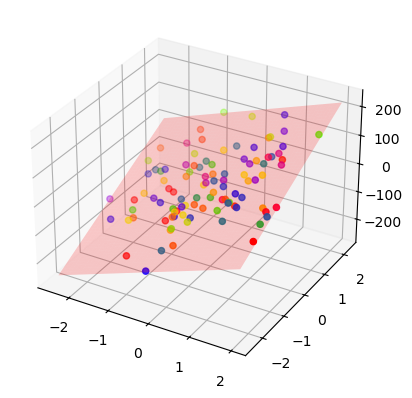

In [15]:
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np

%matplotlib inline 

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap="prism", label="Daten")

x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 50)
x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 50)
X1, X2 = np.meshgrid(x1, x2)

X_grid = np.c_[X1.ravel(), X2.ravel()]   
y_pred = lg2.predict(X_grid).reshape(X1.shape)

# Regressionsfläche plotten
ax.plot_surface(X1, X2, y_pred, color="red", alpha=0.2)

plt.show()